In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
name = 'benzene_old_dft'
mol = 'Benzene'

In [3]:
data = np.load("datasets/{}.npz".format(name))

In [4]:
print(data.files)

['E', 'name', 'F', 'theory', 'R', 'z', 'type', 'md5']


In [5]:
for i in data.files:
    print(i, data[i].shape)

E (627983, 1)
name ()
F (627983, 12, 3)
theory ()
R (627983, 12, 3)
z (12,)
type ()
md5 ()


In [6]:
configs = data['R']

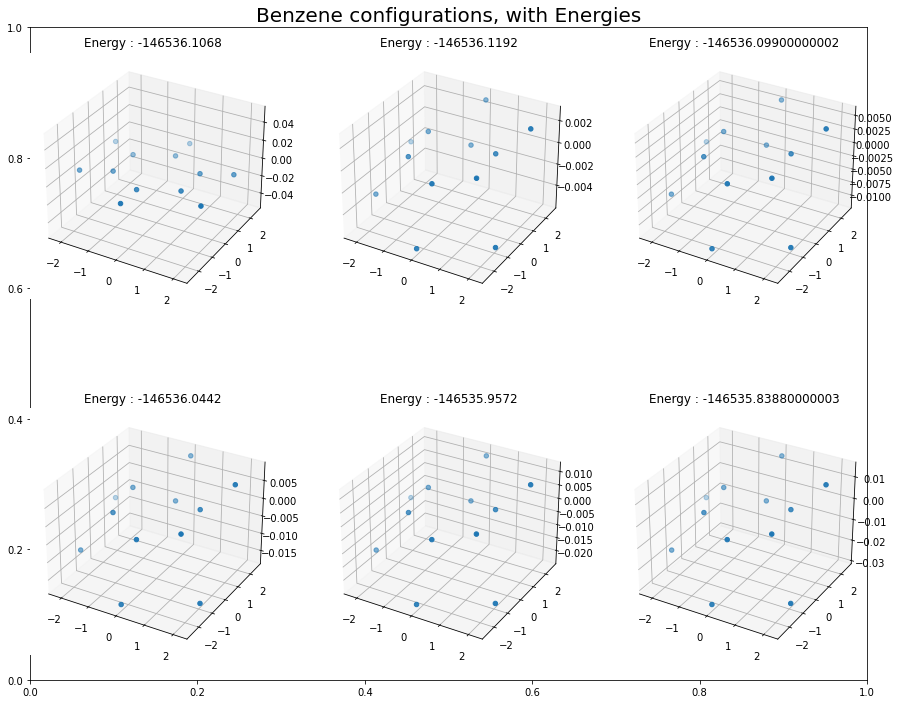

In [13]:
fig = plt.figure(figsize = (15, 12))

plt.title("{} configurations, with Energies".format(mol), fontsize = 20)

for num in range(6):
    ax = fig.add_subplot(2, 3, num + 1, projection = '3d')
    i = configs[num]
    ax.scatter(i[:, 0], i[:, 1], i[:, 2])
    ax.set_title("Energy : {}".format(data['E'][num][0]))
plt.savefig("images/{}_configurations.png".format(mol))
# plt.xticks('off')

### Label statistics

In [15]:
print(data['E'].shape)

(627983, 1)


In [20]:
from matplotlib import colors

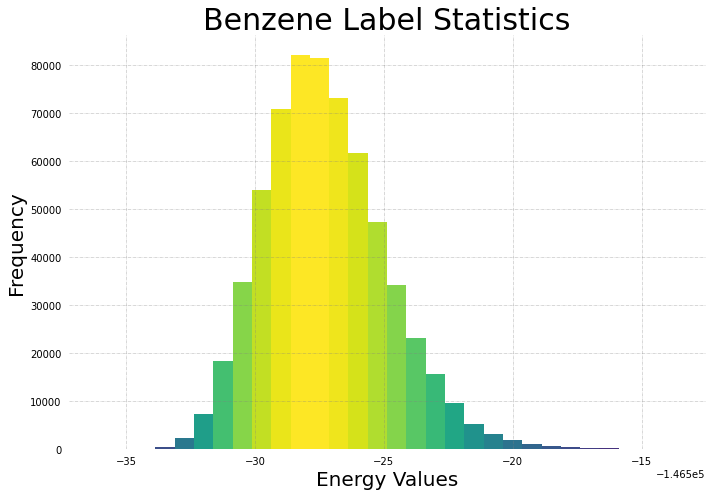

In [24]:
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7), 
                        tight_layout = True)
for s in ['top', 'bottom', 'left', 'right']: 
    axs.spines[s].set_visible(False) 
    
axs.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.6) 

N, bins, patches = axs.hist(data['E'], bins = 30)
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
axs.xaxis.set_ticks_position('none') 
axs.yaxis.set_ticks_position('none')

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
axs.set_xlabel("Energy Values", fontsize = 20)
axs.set_ylabel("Frequency", fontsize = 20)

axs.set_title("{} Label Statistics".format(mol), fontsize = 30)

plt.savefig("images/{}_label_statistics.png".format(mol))